In [2]:
pip install ucimlrepo

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

data_features = pd.DataFrame(heart_disease.data.features, columns=heart_disease.data.feature_names)
data_targets = pd.Series(heart_disease.data.targets.squeeze(), name='Outcome')


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
data_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [5]:
data_targets.head()

0    0
1    2
2    1
3    0
4    0
Name: Outcome, dtype: int64

In [6]:
heart_disease

{'data': {'ids': None,
  'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
  0     63    1   1       145   233    1        2      150      0      2.3   
  1     67    1   4       160   286    0        2      108      1      1.5   
  2     67    1   4       120   229    0        2      129      1      2.6   
  3     37    1   3       130   250    0        0      187      0      3.5   
  4     41    0   2       130   204    0        2      172      0      1.4   
  ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
  298   45    1   1       110   264    0        0      132      0      1.2   
  299   68    1   4       144   193    1        0      141      0      3.4   
  300   57    1   4       130   131    0        0      115      1      1.2   
  301   57    0   2       130   236    0        2      174      0      0.0   
  302   38    1   3       138   175    0        0      173      0      0.0   
  
       slope   ca  thal  


In [7]:
#1
#heart_disease = fetch_ucirepo(id=45)
#class_labels = LabelEncoder()
#X['sex'] = class_labels.fit_transform(X['sex'].values)
#X['cp'] = class_labels.fit_transform(X['cp'].values)
#X['chol'] = class_labels.fit_transform(X['chol'].values)
#X['fbs'] = class_labels.fit_transform(X['fbs'].values)
#X['restecg'] = class_labels.fit_transform(X['restecg'].values)
#X['thalach'] = class_labels.fit_transform(X['thalach'].values)
#X['exang'] = class_labels.fit_transform(X['exang'].values)
#X['oldpeak'] = class_labels.fit_transform(X['oldpeak'].values)
#X['slope'] = class_labels.fit_transform(X['slope'].values)
#X['ca'] = class_labels.fit_transform(X['ca'].values)
#X['thal'] = class_labels.fit_transform(X['thal'].values)
#heart_disease_df = pd.DataFrame(heart_disease.data, columns=heart_disease.feature_names)
heart_disease_df = pd.DataFrame(heart_disease.data.features, columns=heart_disease.data.feature_names)
heart_disease_df.head()
columns_to_encode = ['sex','cp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
heart_disease_end = pd.get_dummies(heart_disease_df[columns_to_encode])
heart_disease_end

,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,1,233,1,2,150,0,2.3,3,0.0,6.0
1,1,4,286,0,2,108,1,1.5,2,3.0,3.0
2,1,4,229,0,2,129,1,2.6,2,2.0,7.0
3,1,3,250,0,0,187,0,3.5,3,0.0,3.0
4,0,2,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,264,0,0,132,0,1.2,2,0.0,7.0
299,1,4,193,1,0,141,0,3.4,2,2.0,7.0
300,1,4,131,0,0,115,1,1.2,2,1.0,7.0
301,0,2,236,0,2,174,0,0.0,2,1.0,3.0


In [8]:
#2
from sklearn.linear_model import LinearRegression
heart_disease_end = heart_disease_end[['sex','cp','chol','fbs','restecg', 'exang','oldpeak','slope','ca']].dropna()
X = np.array(heart_disease_end['sex']).reshape(-1,1)
y = np.array(heart_disease_end['chol']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
y_pred
accuracy_score = regression_model.score(X_test, y_test)
print(accuracy_score)

0.02960914256257763


The model did not work well with the prediction of cholesterol since the value for accuracy is extremely low. When tested with other columns, the accuracy score is always low and sometimes even negative. Linear Regression is not a good model for this data set as the values in the columns are not linear and can't be classified into values of 0 and 1. 

<Axes: >

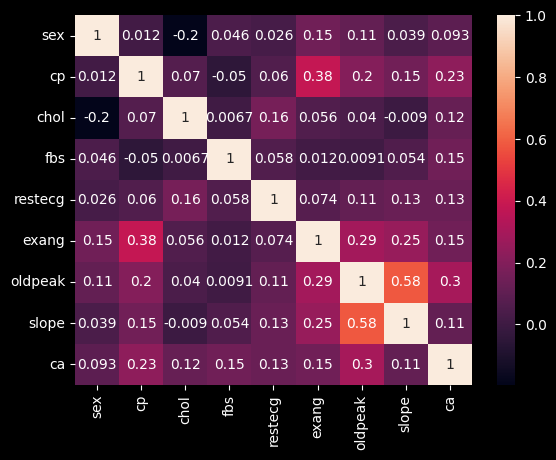

In [9]:
import seaborn as sns
sns.heatmap(heart_disease_end.corr(), annot=True)

In [10]:
#3
X = heart_disease_end.drop(['sex'], axis = 1)
y = heart_disease_end['sex']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15) 
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)
print(y_pred)
print(type(y_pred))

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1]
<class 'numpy.ndarray'>


In [11]:
print(knn.score(X_test, y_test))

0.7333333333333333


In [12]:
acc_train=[]
acc_test=[]

neighbors=range(1,50)

for neighbor in neighbors:
    KNN=KNeighborsClassifier(n_neighbors=neighbor)
    KNN.fit(X_train,y_train)
    acc_train.append(KNN.score(X_train,y_train))
    acc_test.append(KNN.score(X_test,y_test))
    

In [13]:
print(acc_train)
print(acc_test)

[1.0, 0.8325358851674641, 0.8516746411483254, 0.7511961722488039, 0.7799043062200957, 0.7416267942583732, 0.69377990430622, 0.69377990430622, 0.6794258373205742, 0.6794258373205742, 0.6794258373205742, 0.6746411483253588, 0.6794258373205742, 0.6698564593301436, 0.6746411483253588, 0.6650717703349283, 0.6746411483253588, 0.6507177033492823, 0.6650717703349283, 0.6555023923444976, 0.6794258373205742, 0.6794258373205742, 0.6889952153110048, 0.6842105263157895, 0.6842105263157895, 0.6746411483253588, 0.6698564593301436, 0.6842105263157895, 0.6794258373205742, 0.6794258373205742, 0.6889952153110048, 0.6746411483253588, 0.6794258373205742, 0.6842105263157895, 0.6794258373205742, 0.6698564593301436, 0.69377990430622, 0.69377990430622, 0.69377990430622, 0.6985645933014354, 0.6794258373205742, 0.6889952153110048, 0.6746411483253588, 0.6794258373205742, 0.6794258373205742, 0.6794258373205742, 0.6746411483253588, 0.6794258373205742, 0.6746411483253588]
[0.6111111111111112, 0.5777777777777777, 0.6

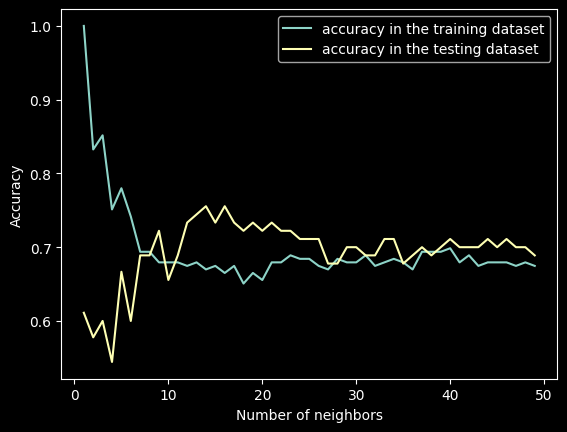

In [14]:
import matplotlib.pyplot as plt
plt.plot(neighbors,acc_train, label="accuracy in the training dataset")
plt.plot(neighbors,acc_test, label="accuracy in the testing dataset")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()

In [33]:
def optimal_n_neighbors(count):
    optimal_k = 0
    optimal_diff = 1
    diff = 0

    neighbors=range(1,count)

    for neighbor in neighbors:
        KNN=KNeighborsClassifier(n_neighbors=neighbor)
        KNN.fit(X_train,y_train)
        atrain=KNN.score(X_train,y_train)
        atest=KNN.score(X_test,y_test)
        if atrain > atest:
            diff = atrain - atest
        else:
            diff = atest - atrain
        if diff < optimal_diff:
            optimal_diff = diff
            optimal_k = neighbor

    return optimal_k

In [34]:
print (f"Optimal K: {optimal_n_neighbors(15)}")

Optimal K: 7


In [36]:

X = heart_disease_end.drop(['sex'], axis = 1)
y = heart_disease_end['sex']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=optimal_n_neighbors(15)) 
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)
print(y_pred)
print(type(y_pred))





[1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0
 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1]
<class 'numpy.ndarray'>


In [20]:
print(knn.score(X_test, y_test))

0.6888888888888889


In [21]:
print(knn.score(X_train, y_train))

0.69377990430622


In [13]:
#4
from sklearn.linear_model import LogisticRegression
X = heart_disease_end.drop('sex', axis=1)
y = heart_disease_end['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state=42,
                                                   stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
regression = LogisticRegression(random_state=42).fit(X_train, y_train)
y_predicted = regression.predict(X_test)
y_predicted
regression.score(X_test, y_test)

0.65

This model works decently well when getting a regression score for the sex column of the data. A score of 0.65 means that 65% of the sex column data is correlated with the rest of the data in the dataset meaning it is a fairly ok score. 

In [14]:
#5
heart_min_max_scaled = heart_disease_end.copy()
for column in heart_min_max_scaled.columns: 
    heart_min_max_scaled[column] = (heart_min_max_scaled[column] - heart_min_max_scaled[column].min()) / (heart_min_max_scaled[column].max() - heart_min_max_scaled[column].min())  
print(heart_min_max_scaled)

     sex        cp      chol  fbs  restecg  exang   oldpeak  slope        ca
0    1.0  0.000000  0.244292  1.0      1.0    0.0  0.370968    1.0  0.000000
1    1.0  1.000000  0.365297  0.0      1.0    1.0  0.241935    0.5  1.000000
2    1.0  1.000000  0.235160  0.0      1.0    1.0  0.419355    0.5  0.666667
3    1.0  0.666667  0.283105  0.0      0.0    0.0  0.564516    1.0  0.000000
4    0.0  0.333333  0.178082  0.0      1.0    0.0  0.225806    0.0  0.000000
..   ...       ...       ...  ...      ...    ...       ...    ...       ...
297  0.0  1.000000  0.262557  0.0      0.0    1.0  0.032258    0.5  0.000000
298  1.0  0.000000  0.315068  0.0      0.0    0.0  0.193548    0.5  0.000000
299  1.0  1.000000  0.152968  1.0      0.0    0.0  0.548387    0.5  0.666667
300  1.0  1.000000  0.011416  0.0      0.0    1.0  0.193548    0.5  0.333333
301  0.0  0.333333  0.251142  0.0      1.0    0.0  0.000000    0.5  0.333333

[299 rows x 9 columns]


Normalizing the dataset does not change the performance and accuracy for questions 2-4. Scaling the data to the max and min does not change the classification of the values, so the values of the models remain the same. 

In [15]:
from sklearn.linear_model import LinearRegression
heart_disease_end = heart_min_max_scaled[['sex','cp','chol','fbs','restecg', 'exang','oldpeak','slope','ca']].dropna()
X = np.array(heart_min_max_scaled['sex']).reshape(-1,1)
y = np.array(heart_min_max_scaled['chol']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
y_pred
accuracy_score = regression_model.score(X_test, y_test)
print(accuracy_score)

0.02960914256257774


In [23]:
X = heart_min_max_scaled.drop(['sex'], axis = 1)
y = heart_min_max_scaled['sex']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15) 
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)
print(y_pred)
print(type(y_pred))

[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [24]:
print(knn.score(X_test, y_test))

0.7333333333333333


<Axes: >

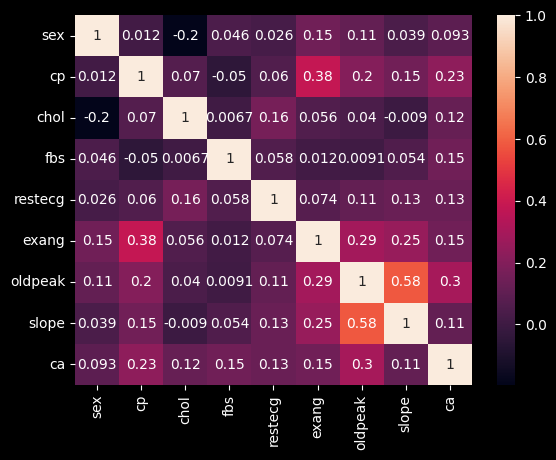

In [27]:
import seaborn as sns
sns.heatmap(heart_min_max_scaled.corr(), annot=True)

In [38]:
#Extra credit

def optimal_n_neighbors(count: int) -> int:
    optimal_k = 0
    optimal_diff = 1
    diff = 0

    neighbors=range(1,count)

    for neighbor in neighbors:
        KNN=KNeighborsClassifier(n_neighbors=neighbor)
        KNN.fit(X_train,y_train)
        atrain=KNN.score(X_train,y_train)
        atest=KNN.score(X_test,y_test)
        if atrain > atest:
            diff = atrain - atest
        else:
            diff = atest - atrain
        if diff < optimal_diff:
            optimal_diff = diff
            optimal_k = neighbor

    return optimal_k


print (f"Optimal K: {optimal_n_neighbors(15)}")
print (f"Optimal K: {optimal_n_neighbors("15")}")

Optimal K: 7


TypeError: 'str' object cannot be interpreted as an integer